# Table of Contents
<ul>
<li>Introduction</li>
<li>Importing The Libraries</li>
<li>Reading The Data</li>
<li>Data Inspection</li>
<li>Data Preprocessing</li>
<li>Building The Models</li>
<li>Evaluating The Models Performance</li>
</ul>

# Introduction
> In this project i will build a machine learning model cabable of predicting the concrete compressive strength based on some features.

# Importing The Libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':[9,9]},font_scale = 1.3)

# Reading The Data

In [2]:
df = pd.read_excel('Concrete_Data (4).xlsx')

# Data Inspection

In [3]:
#The first five rows from the data
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
#The shape of the data
df.shape

(1030, 9)

In [5]:
#The data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

- Our data set contains quantitative data, 8 columns are continuous and one column is discrete.
- No missing values in the data.

In [6]:
#Statistical description to the data
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [7]:
#Changing the columns names
df.columns = ['comp1','comp2','comp3','comp4','comp5','comp6','comp7','age','label']
#The first five rows
df.head()

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,age,label
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


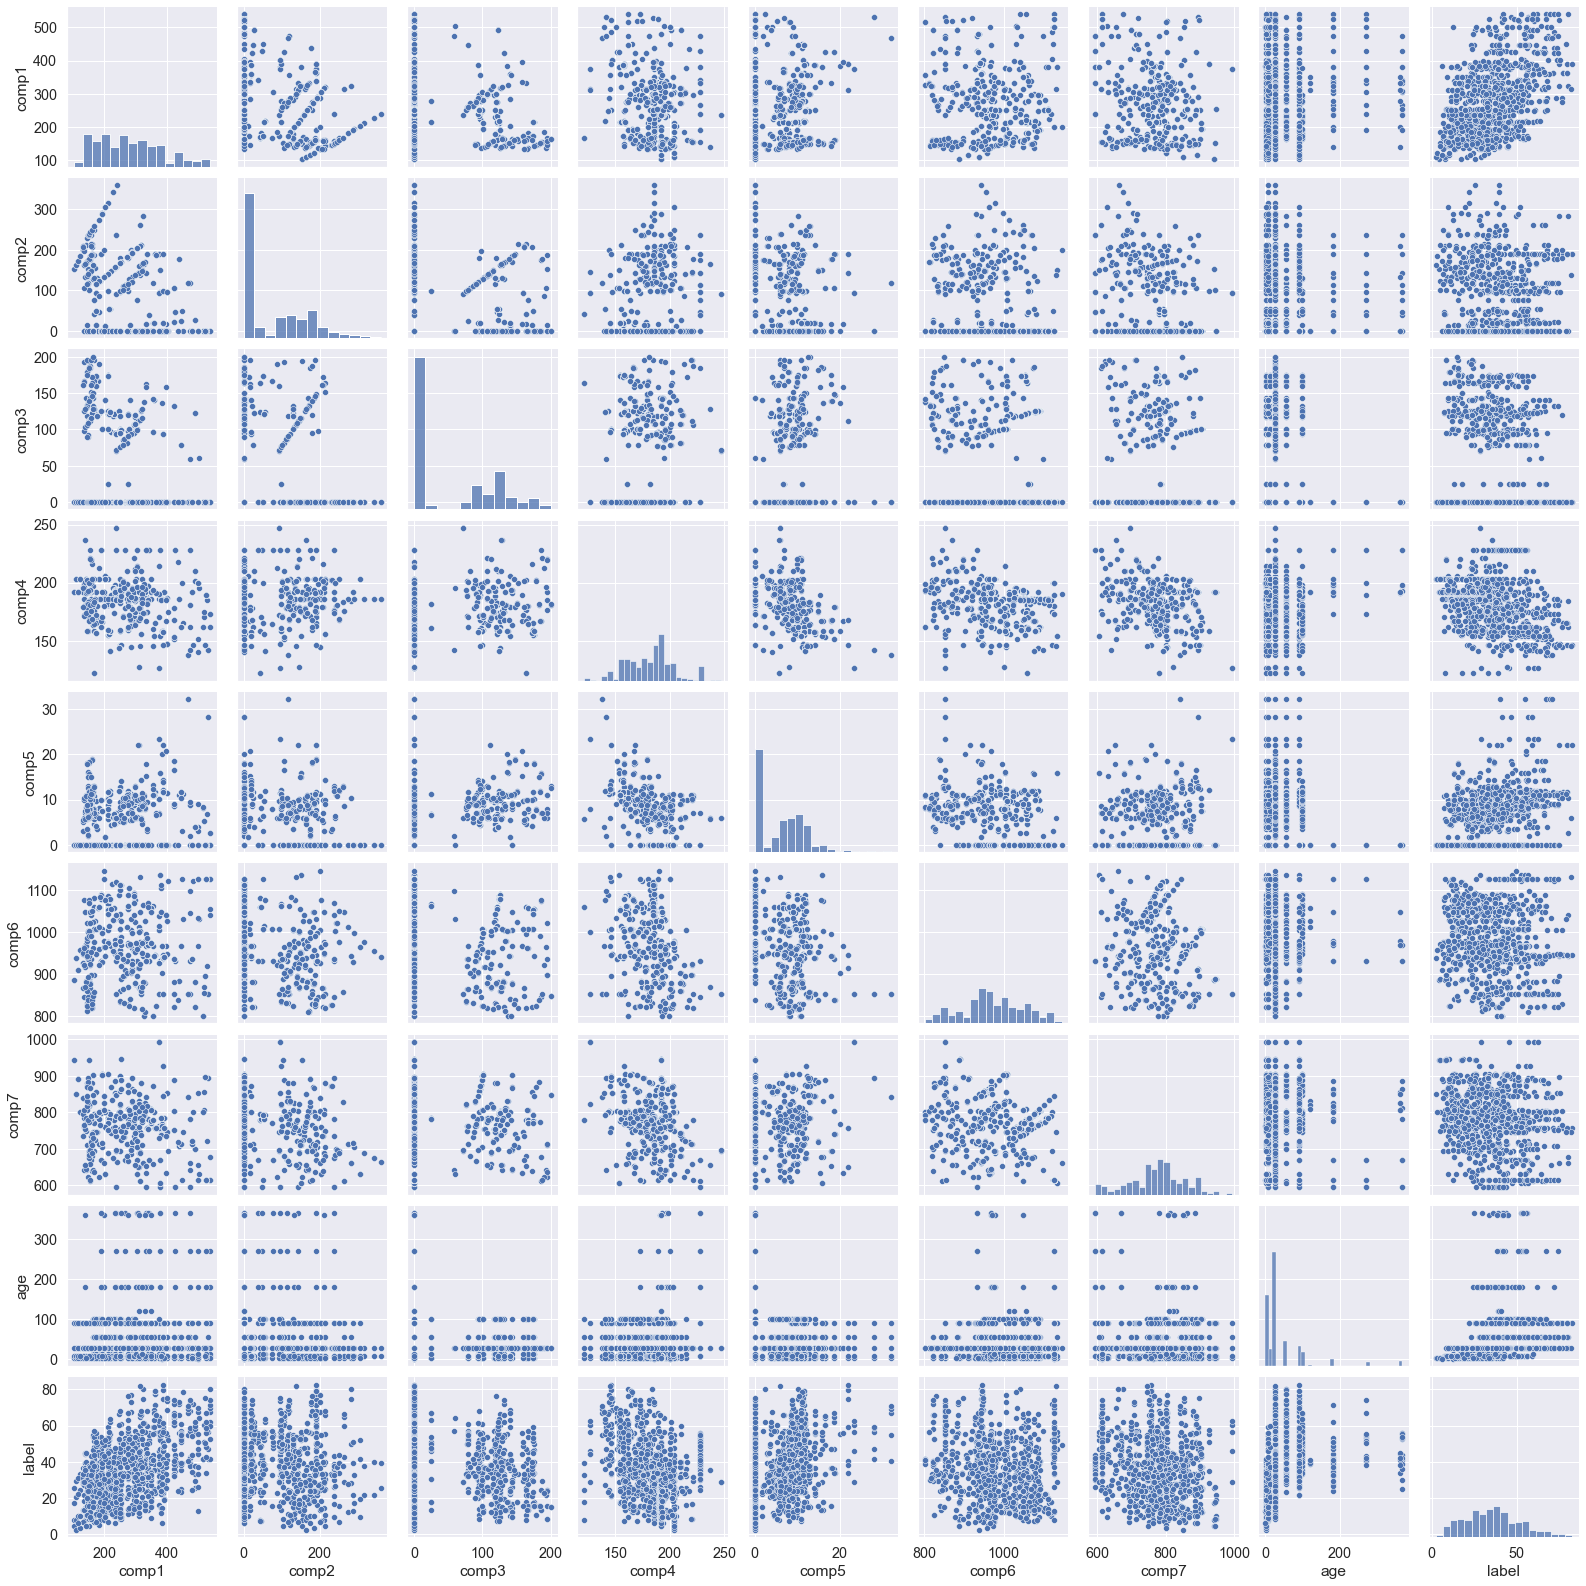

In [8]:
sns.pairplot(df)
plt.show()

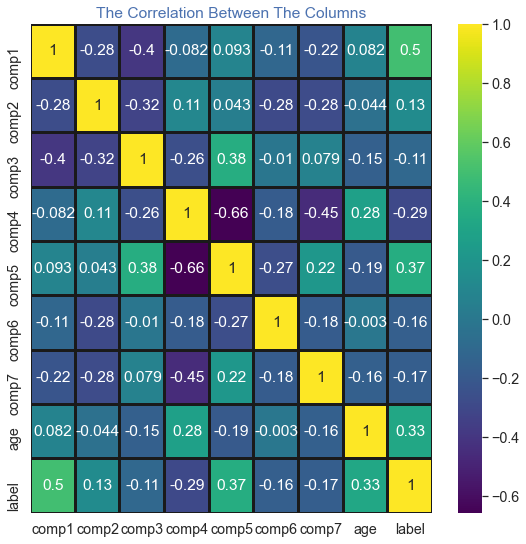

In [9]:
sns.heatmap(df.corr(),annot = True,linewidth = 2,linecolor = 'k',cmap = 'viridis')
plt.title('The Correlation Between The Columns',color = 'b')
plt.show()

- From scatter plot and heat map we can see that the correlation between the columns is weak even if it's positive or negative.

# Data Preprocessing

In [10]:
#Splitting the data to x and y
x = df.drop('label',axis = 1)
y = df['label']

In [11]:
#Scaling the features
scaler = StandardScaler()
scaler.fit(x)
x_new = scaler.transform(x)

In [12]:
#Splitting the data for training and testing
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size = 0.2,random_state = 1)

In [13]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (824, 8)
y_train shape: (824,)
x_test shape: (206, 8)
y_test shape: (206,)


# Building The Models

##### `Linear Regression`

Training Score: 0.633705287414557
Testing Score: 0.5209616457703191


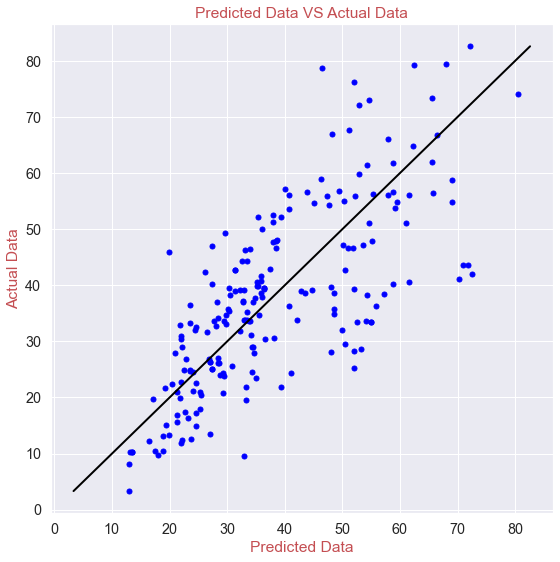

In [47]:
#Fitting the model
lr = LinearRegression()
lr.fit(x_train,y_train)

#The predicted data
lr_y_pred = lr.predict(x_test)

#The model accuracy
print('Training Score:',lr.score(x_train,y_train))
print('Testing Score:',lr.score(x_test,y_test))

#Plotting the model performance
plt.scatter(lr_y_pred,y_test,c = 'blue',marker = 'o',s = 25)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c = 'black',lw = 2)
plt.xlabel('Predicted Data',c = 'r')
plt.ylabel('Actual Data',c = 'r')
plt.title('Predicted Data VS Actual Data',c = 'r')
plt.show()

- So weak accuracy in both of training and testing.

##### `Lasso With Polynomial Features`

Training Score: 0.9333742812917186
Testing Score: 0.8815479724400025


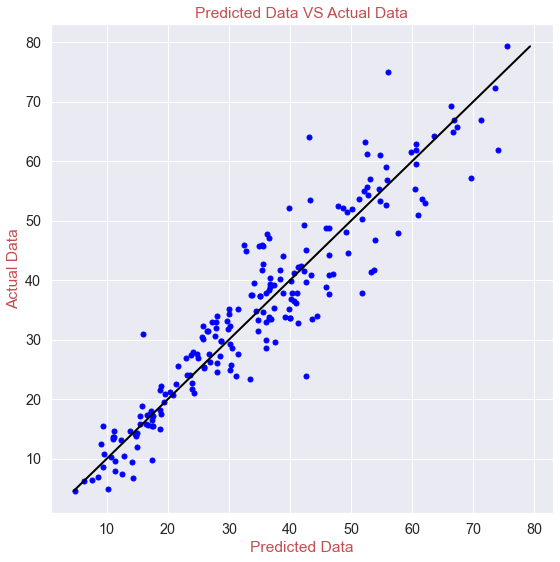

In [50]:
#Applying polynomial features
poly = PolynomialFeatures(degree = 5)
poly.fit(x.values)
poly_x = poly.transform(x.values)

#Scaling the data
scaler = StandardScaler()
scaler.fit(poly_x)
poly_x = scaler.transform(poly_x)

#Splitting the data for training and testing
p_x_train,p_x_test,p_y_train,p_y_test = train_test_split(poly_x,y,random_state=0,test_size = 0.2)

#Fitting the lasso model
lasso = Lasso(alpha = 0.004)
lasso.fit(p_x_train,p_y_train)

#The predicted data
lasso_pred = lasso.predict(p_x_test)

#The model accuracy
print('Training Score:',lasso.score(p_x_train,p_y_train))
print('Testing Score:',lasso.score(p_x_test,p_y_test))

#Plotting the model performance
plt.scatter(lasso_pred,p_y_test,c = 'blue',marker = 'o',s = 25)
plt.plot([p_y_test.min(),p_y_test.max()],[p_y_test.min(),p_y_test.max()],c = 'black',lw = 2)
plt.xlabel('Predicted Data',c = 'r')
plt.ylabel('Actual Data',c = 'r')
plt.title('Predicted Data VS Actual Data',c = 'r')
plt.show()

- Awesome, using the lasso model with the polynomial features helped a lot in rising the accuracy in both training and testing. 

##### `Optimizing The Accuracy Of Lasso Model`

Training Score: 0.9999991086809153
Testing Score: 0.9999990934090051


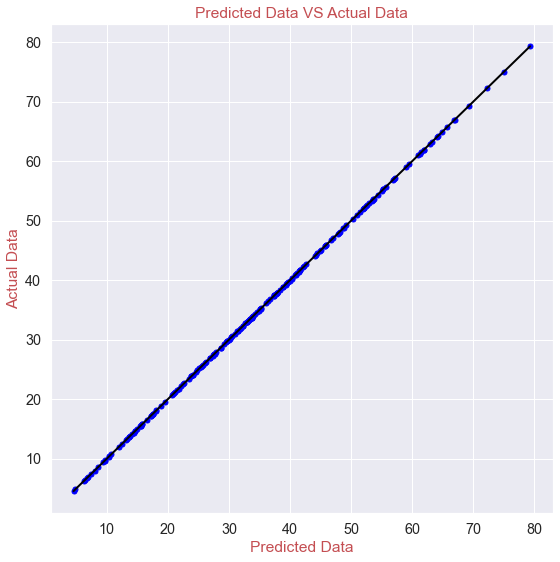

In [59]:
#Taking a copy of x
x_copy = x.copy()

# Getting the dummies for age column 
x_copy = pd.get_dummies(df,columns = ['age'],drop_first = True)

#Applying polynomial features
poly_new = PolynomialFeatures(degree = 5)
poly_new.fit(x_copy.values)
poly_new_x = poly_new.transform(x_copy.values)

#Scaling the data
scaler = StandardScaler()
scaler.fit(poly_new_x)
poly_new_x = scaler.transform(poly_new_x)

#Splitting the data for training and testing
p_new_x_train,p_new_x_test,p_new_y_train,p_new_y_test = train_test_split(poly_new_x,y,random_state=0,test_size = 0.2)

#Fitting the lasso model
lasso_new = Lasso(alpha = 0.004)
lasso_new.fit(p_new_x_train,p_new_y_train)

#The predicted data
lasso_new_pred = lasso_new.predict(p_new_x_test)

#The model accuracy
print('Training Score:',lasso_new.score(p_new_x_train,p_new_y_train))
print('Testing Score:',lasso_new.score(p_new_x_test,p_new_y_test))

#Plotting the model performance
plt.scatter(lasso_new_pred,p_new_y_test,c = 'blue',marker = 'o',s = 25)
plt.plot([p_new_y_test.min(),p_new_y_test.max()],[p_new_y_test.min(),p_new_y_test.max()],c = 'black',lw = 2)
plt.xlabel('Predicted Data',c = 'r')
plt.ylabel('Actual Data',c = 'r')
plt.title('Predicted Data VS Actual Data',c = 'r')
plt.show()

- Amazing, the accuracy optimized a alot in both training and testing and the reason for that is the age feature, actually age feature looks like quantitative data from discrete type but i considered it qualitative data from nominal type so, i used the `one hot encoding` technique for transfereing it. Transfering age helped the scalling process to manage the data more and more after polynomial features and helped actually in selecting the appropriate `weights` for the age feature and finally this transfering helped in the accuracy for both training and testing.

# Evaluating The Models Performance

In [72]:
models = {'Linear Regression':[lr,x_train,y_train,y_test,lr_y_pred],
            'Lasso':[lasso,p_x_train,p_y_train,p_y_test,lasso_pred],
            'Optimized Lasso':[lasso_new,p_new_x_train,p_new_y_train,p_new_y_test,lasso_new_pred]
         }   
for model_name, model_lst in models.items():
    print(model_name,': ')
    print('Training Score: ',model_lst[0].score(model_lst[1],model_lst[2]))
    print('Testing Score: ',r2_score(model_lst[3],model_lst[4]))
    print('MSE:',mean_squared_error(model_lst[3],model_lst[4]))
    print('MAE:',mean_absolute_error(model_lst[3],model_lst[4]))
    print('--------------------------------')

Linear Regression : 
Training Score:  0.633705287414557
Testing Score:  0.5209616457703191
MSE: 124.88351322372013
MAE: 8.823124277117977
--------------------------------
Lasso : 
Training Score:  0.9333742812917186
Testing Score:  0.8815479724400025
MSE: 31.198403641657695
MAE: 4.092308465189548
--------------------------------
Optimized Lasso : 
Training Score:  0.9999991086809153
Testing Score:  0.9999990934090051
MSE: 0.00023878182906220092
MAE: 0.011375983457917085
--------------------------------


- I called lasso_new model as optimized lasso and optimized lasso is the best.